# check dataset

In [1]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [2]:
# takes full raw data and extracts waveform of length nticks 
def extract_wave(data, nticks):
    string = 'tck_'
    waveforms = []
    #Here I extract a column in each iteration and append to list
    for i in range(nticks):
        waveforms.append(data[string+str(i)].astype(np.int16))
    #convert to numpy ndarray
    waveforms = np.array(waveforms).astype(np.int16)
    #since raws and columns are inverted we need to transpose it
    return np.transpose(waveforms)

# takes full raw data and returns waveform of length nticks 
def get_std_waveforms(data, nticks):
    #Extract and scale waveform data (passthrough rn)
    raw_waveforms = extract_wave(data, nticks)
    #print(raw_waveforms) 
    #scaled_waveforms = waveform_scaler.fit_transform(raw_waveforms)
    return raw_waveforms

# imposes a max ADC value and filters waves
# takes wavefroms as input
def filter_signal_ADC_max(data, clean_data, adc_max):
    data_wf = []
    clean_wf = []
    for i in range(clean_data.shape[0]):
        if max(clean_data[i]) < adc_max:
            data_wf.append(data[i])
            clean_wf.append(clean_data[i])
    data_wf = np.array(data_wf)
    clean_wf = np.array(clean_wf)
    return data_wf, clean_wf

# imposes a min ADC value and filters waves
# takes wavefroms as input
def filter_signal_ADC_min(data, clean_data, adc_min):
    data_wf = []
    clean_wf = []
    for i in range(clean_data.shape[0]):
        if max(clean_data[i]) > adc_min:
            data_wf.append(data[i])
            clean_wf.append(clean_data[i])
    data_wf = np.array(data_wf)
    clean_wf = np.array(clean_wf)
    return data_wf, clean_wf

In [3]:
# data loader
def get_data(wireplane):

    path_cc = "C:\\Users\\vanth\\Desktop\\Workspace\\new_data\\train_v1\\nu_cc\\"
    path_es = "C:\\Users\\vanth\\Desktop\\Workspace\\new_data\\train_v1\\nu_es\\"
    noise_path = "C:\\Users\\vanth\\Desktop\\Workspace\\new_data\\train_v1\\noise\\"
    print('nu_cc: ', path_cc)
    print('nu_es: ', path_es)
    print('noise: ', noise_path)
    print('')
    print('----------loading----------')
    sig_name = wireplane+"-signal"
    cln_name = wireplane+"-clnsig"
    
    filenames1 = [path_cc+f for f in listdir(path_cc) if (isfile(join(path_cc, f)) and sig_name in f)]
    clean_filenames1 = [path_cc+f for f in listdir(path_cc) if (isfile(join(path_cc, f)) and cln_name in f)]
    filenames2 = [path_es+f for f in listdir(path_es) if (isfile(join(path_es, f)) and sig_name in f)]
    clean_filenames2 = [path_es+f for f in listdir(path_es) if (isfile(join(path_es, f)) and cln_name in f)]
    filenames =  filenames1+filenames2
    clean_filenames = clean_filenames1+clean_filenames2
    noise_filenames = [f for f in listdir(noise_path) if (isfile(join(noise_path, f)) and wireplane in f)]

    combined_data = np.concatenate([np.load(fname) for fname in filenames])
    combined_clean_data = np.concatenate([np.load(fname) for fname in clean_filenames])
    combined_noise = np.concatenate([np.load(noise_path+fname) for fname in noise_filenames])
    print('--------data loaded!-------')

    return combined_data, combined_clean_data, combined_noise

In [4]:
wireplane = 'Z'
nticks = 200
ADC_MIN = 3
combined_data, combined_clean_data, combined_noise = get_data(wireplane)

signal_waveforms = get_std_waveforms(combined_data, nticks)
clean_signal_waveforms = get_std_waveforms(combined_clean_data, nticks)

print('filtering out small signals --> ADC >', ADC_MIN)
print('     noise+signal : ', signal_waveforms.shape)
print('     clean signal : ', clean_signal_waveforms.shape)
signal_waveforms, clean_signal_waveforms = filter_signal_ADC_min(signal_waveforms,
                                            clean_signal_waveforms, ADC_MIN)
print('------------after filtering------------')
print('     noise+signal : ', signal_waveforms.shape)
print('     clean signal : ', clean_signal_waveforms.shape)



nu_cc:  C:\Users\vanth\Desktop\Workspace\new_data\train_v1\nu_cc\
nu_es:  C:\Users\vanth\Desktop\Workspace\new_data\train_v1\nu_es\
noise:  C:\Users\vanth\Desktop\Workspace\new_data\train_v1\noise\

----------loading----------
--------data loaded!-------
filtering out small signals --> ADC > 3
     noise+signal :  (223385, 200)
     clean signal :  (223385, 200)
------------after filtering------------
     noise+signal :  (174968, 200)
     clean signal :  (174968, 200)


In [5]:
# this is the collection plane, so most signals should be unipolar.
# However, it's possible to have some bipolar signals show up.
# Let's see how many

clean_signal_bp = [wave for wave in clean_signal_waveforms if np.any(wave < 0)]
print(len(clean_signal_bp))

47374


In [6]:
max_adcs = [np.max(wave) for wave in signal_waveforms]

In [7]:
np.max(max_adcs)

2235

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


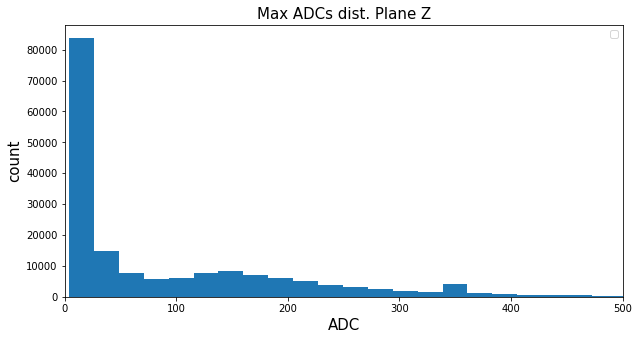

In [8]:
fig = plt.figure(figsize = (10, 5))
plt.hist(max_adcs, bins=100)
plt.legend()
#plt.ylim(-0.1, 0.1)
plt.title('Max ADCs dist. Plane Z', size=15)
plt.xlabel('ADC', size=15)
plt.ylabel('count', size=15)
plt.xlim(0, 500)
plt.show()

In [10]:
47374/174968

0.27075808147775593

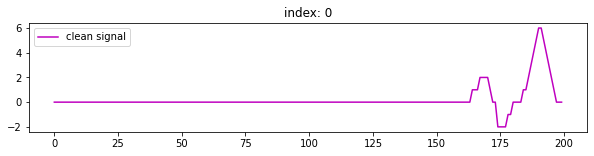

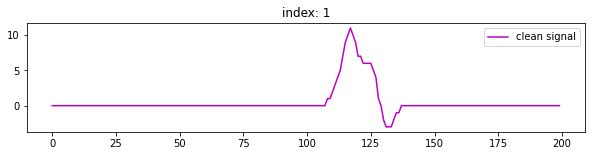

In [26]:
for i in range(2):
    fig = plt.figure(figsize = (10, 2))
    plt.plot(clean_signal_bp[i], color='m', label='clean signal')
    plt.title('index: ' + str(i))
    plt.legend()
    #plt.ylim(-0.1, 0.1)
    plt.show()

In [21]:
clean_signal_bp_2 = [wave for wave in clean_signal_bp if np.any(wave < -(max(wave)-(max(wave)/2)))]


print(len(clean_signal_bp_2))

13040


In [24]:
13040/174968

0.07452791367564354

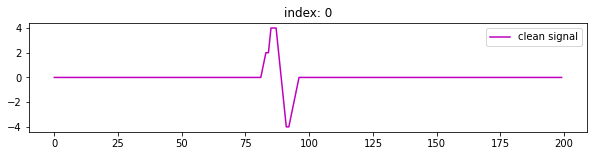

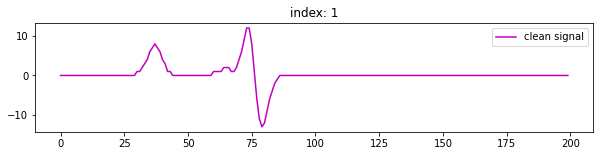

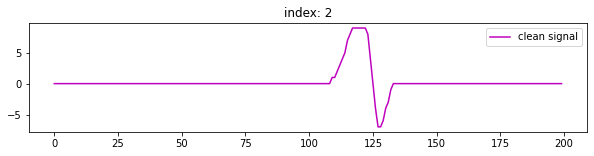

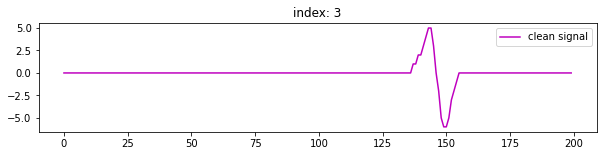

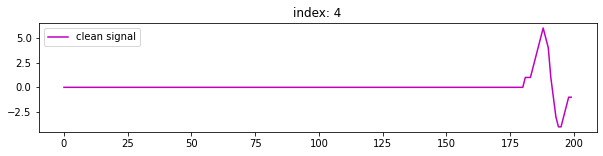

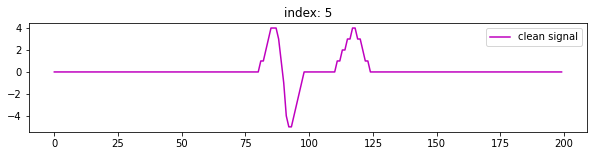

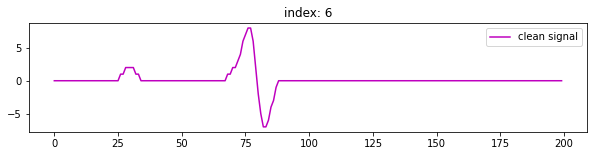

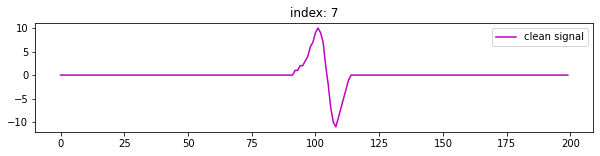

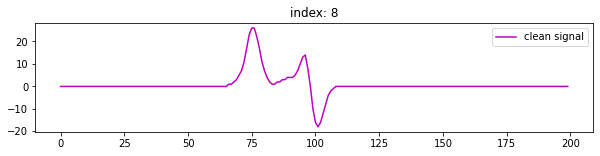

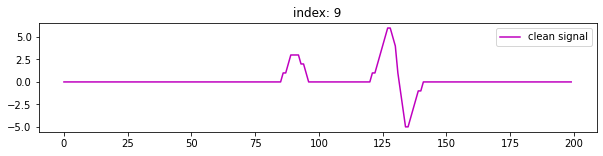

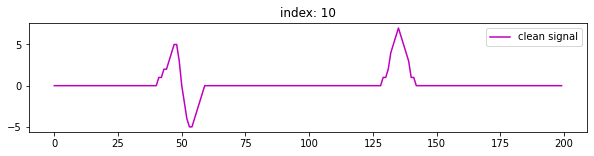

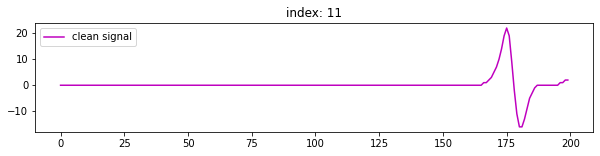

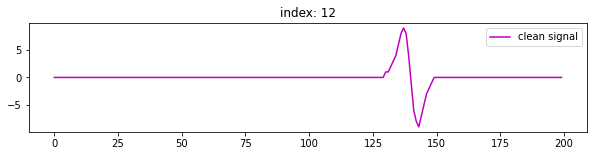

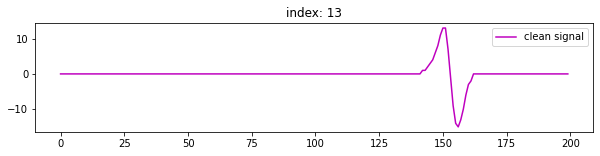

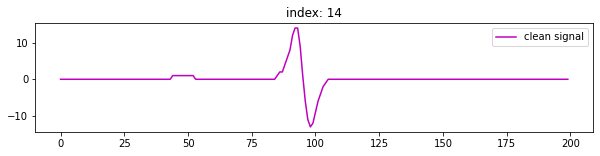

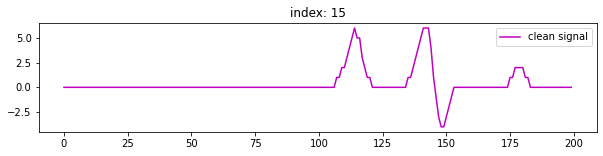

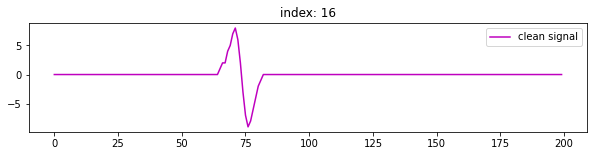

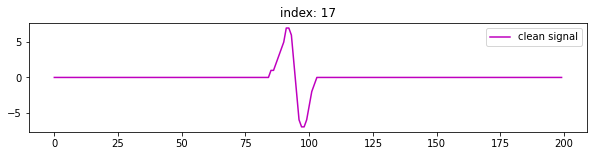

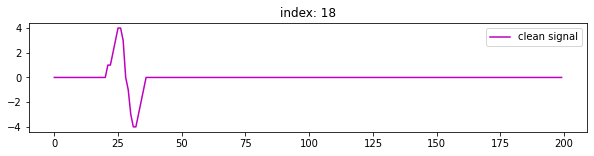

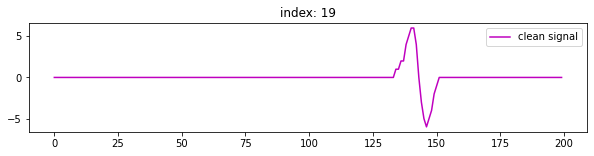

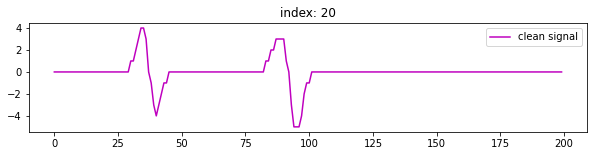

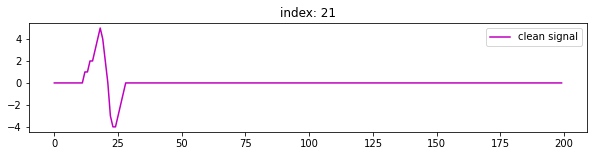

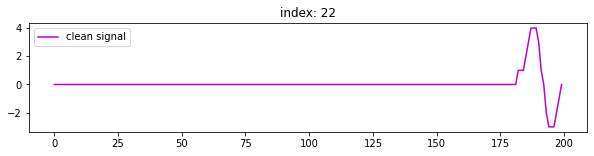

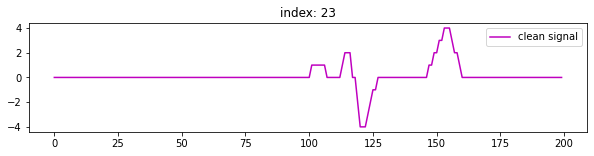

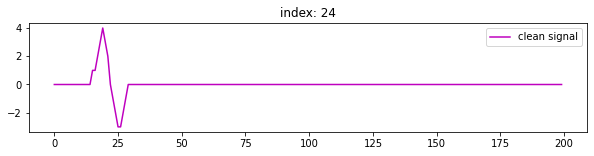

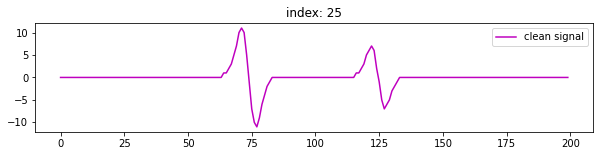

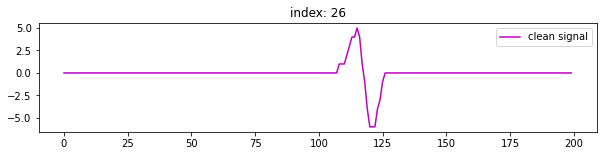

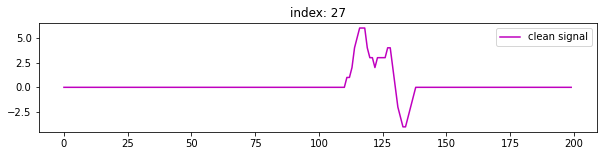

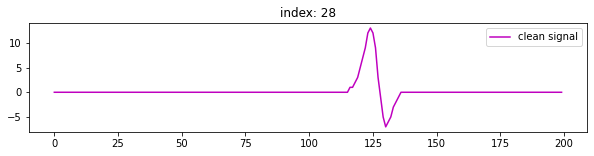

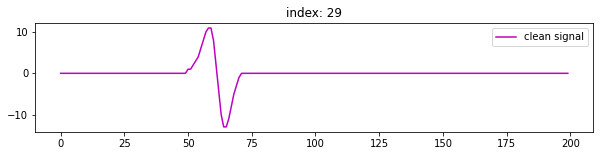

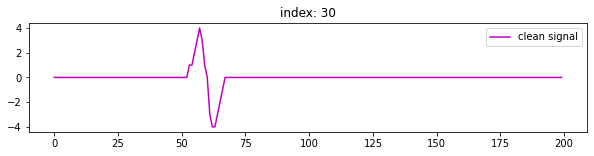

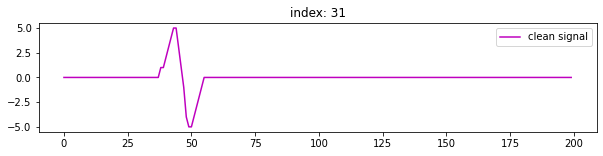

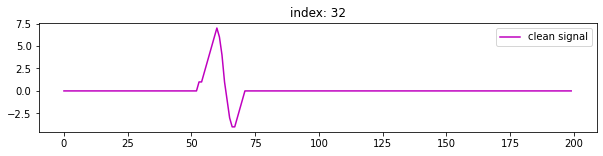

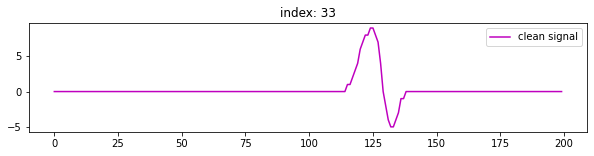

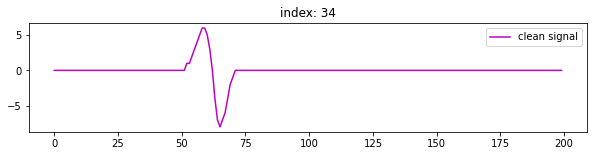

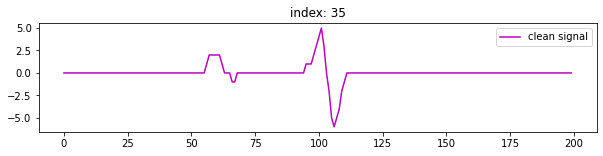

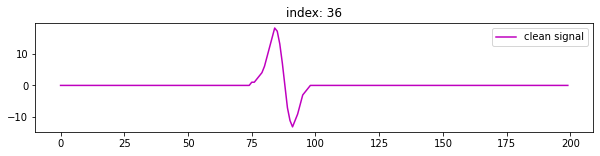

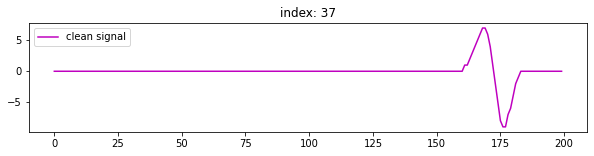

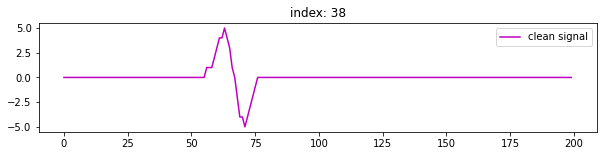

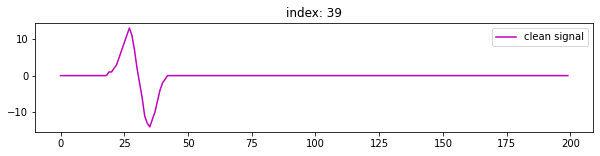

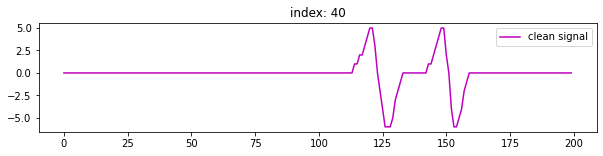

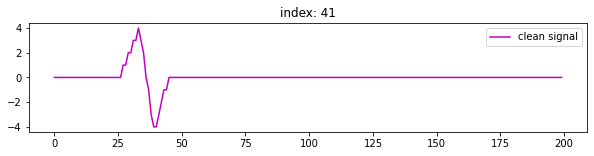

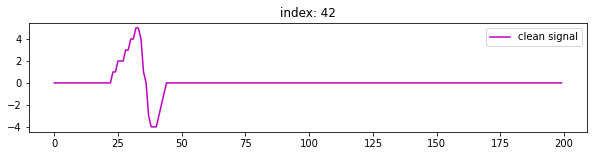

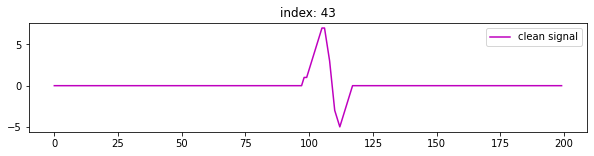

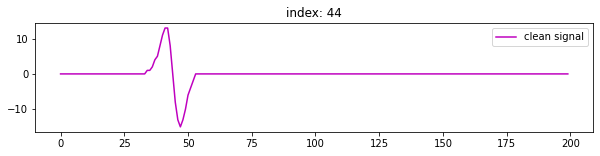

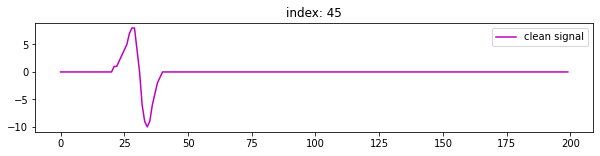

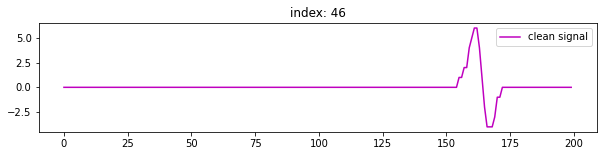

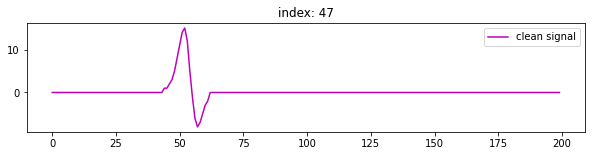

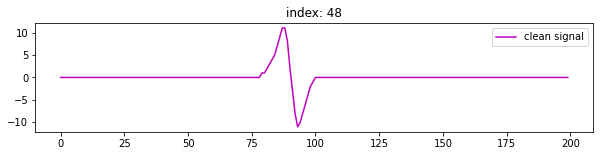

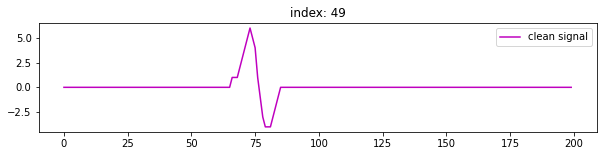

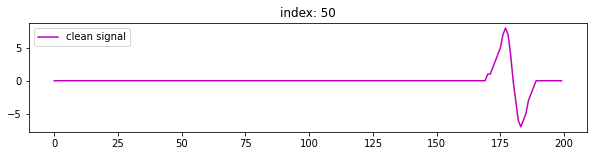

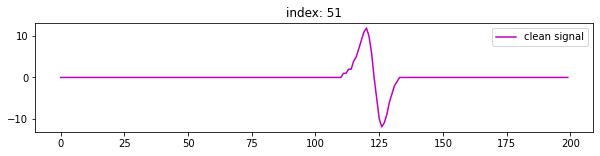

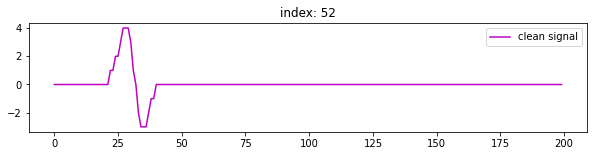

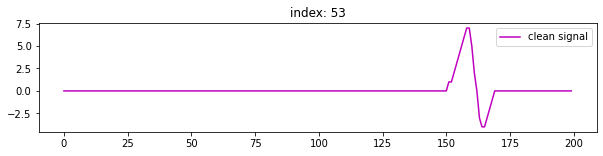

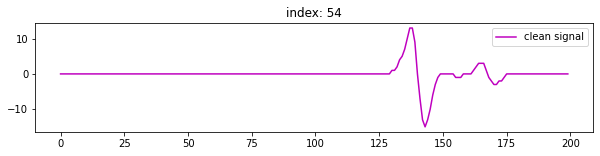

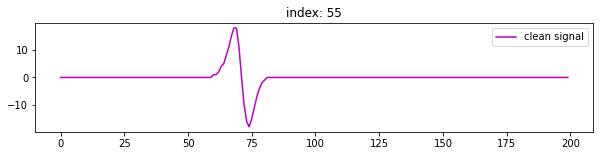

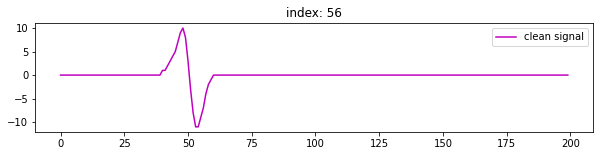

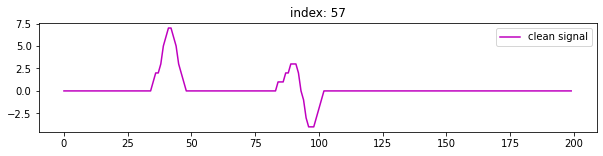

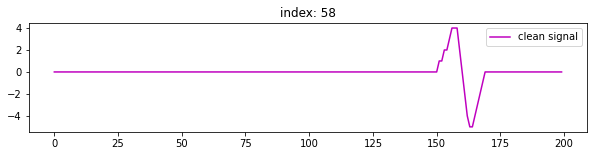

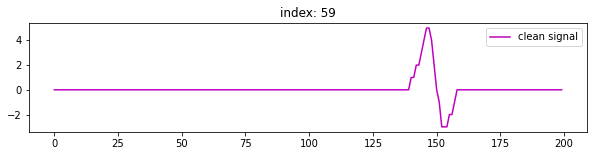

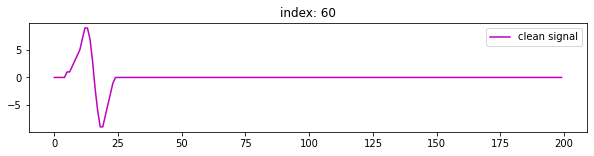

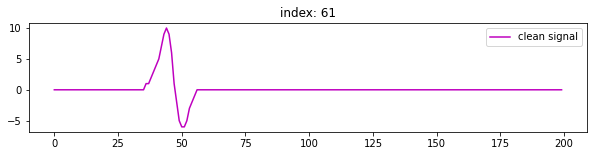

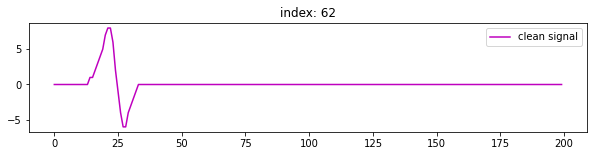

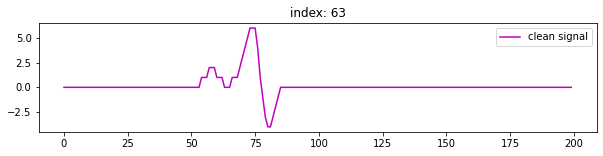

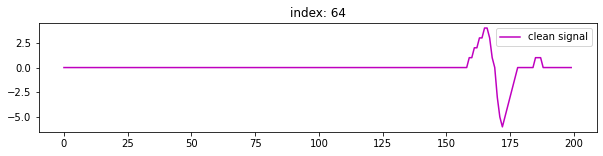

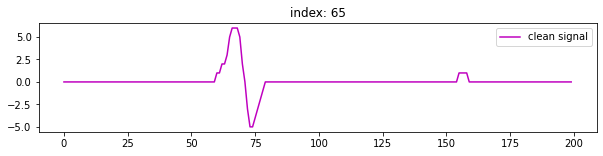

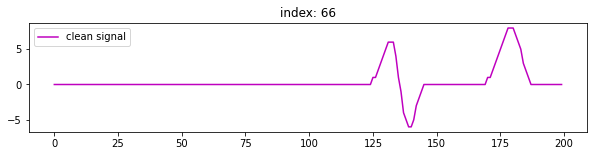

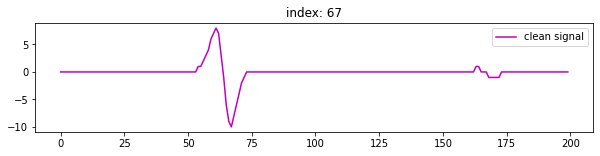

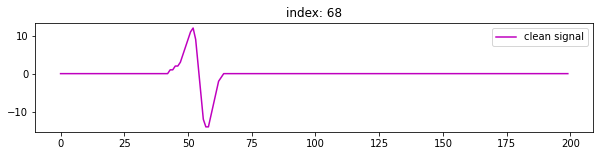

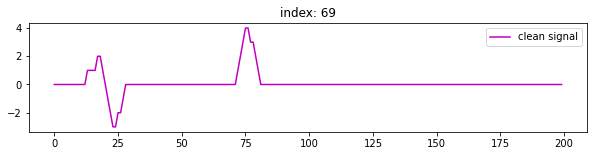

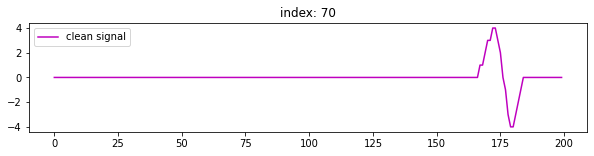

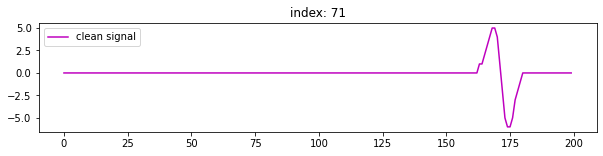

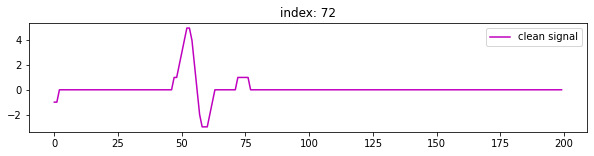

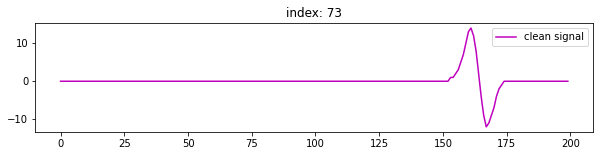

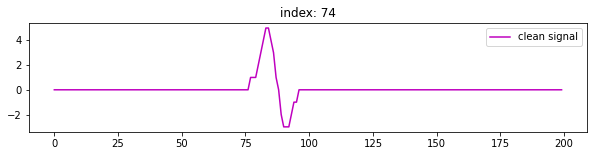

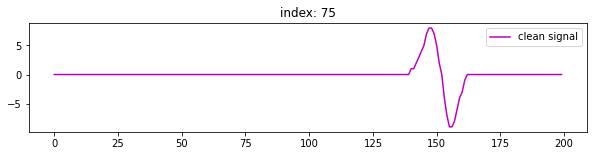

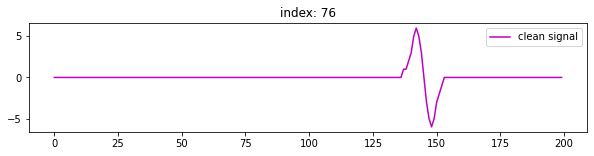

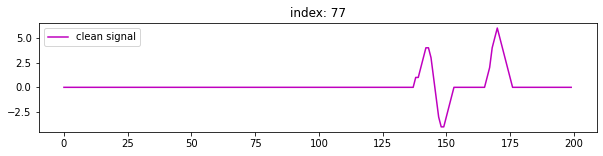

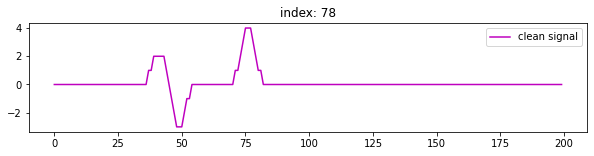

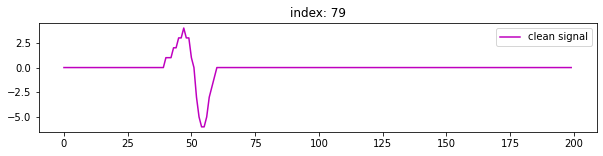

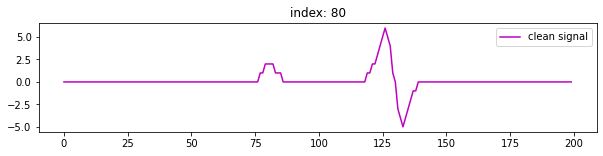

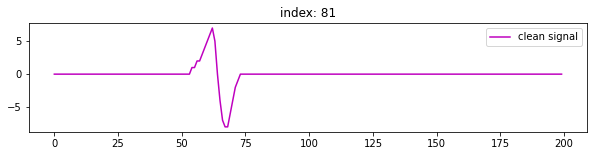

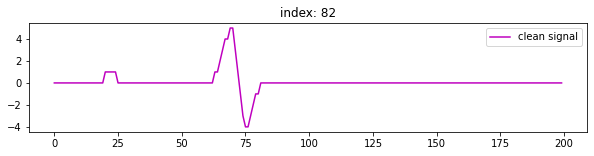

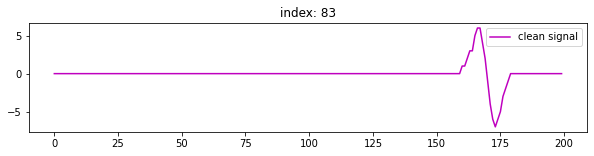

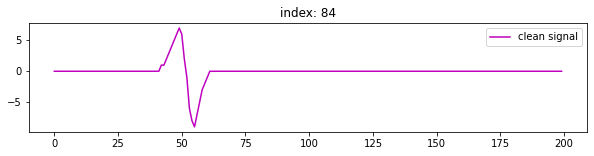

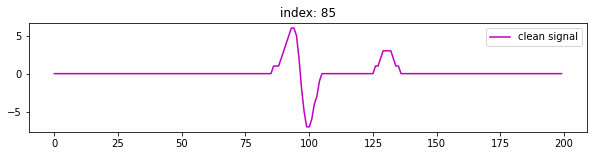

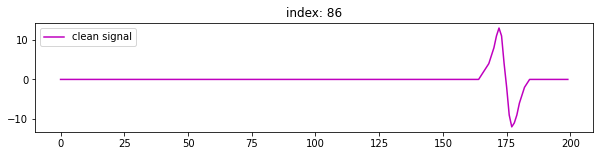

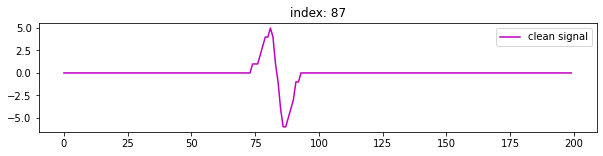

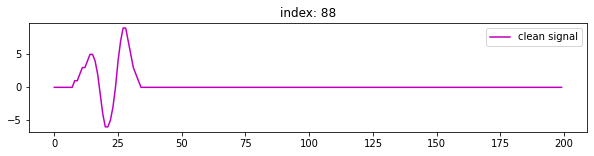

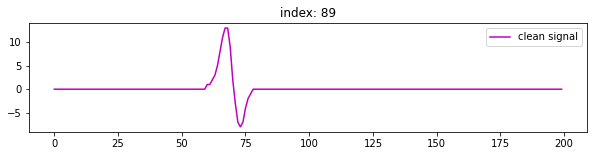

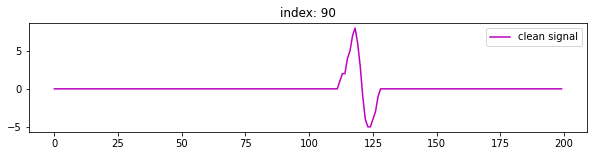

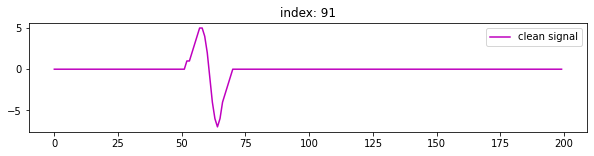

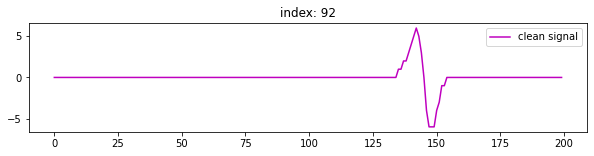

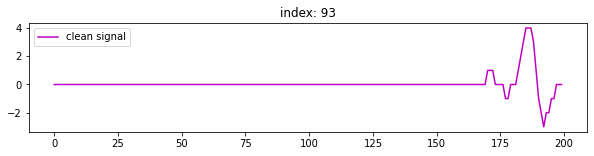

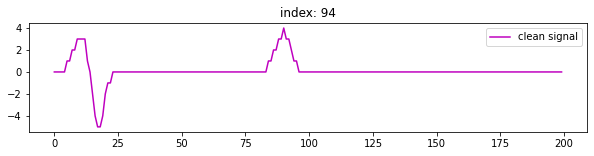

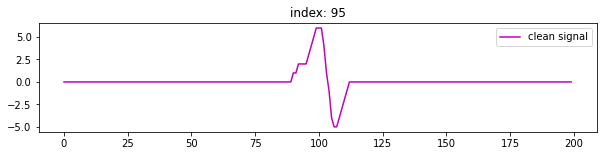

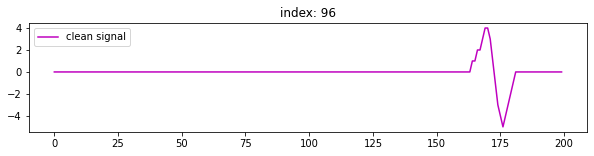

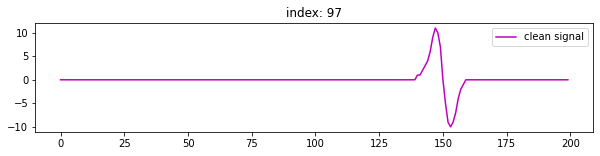

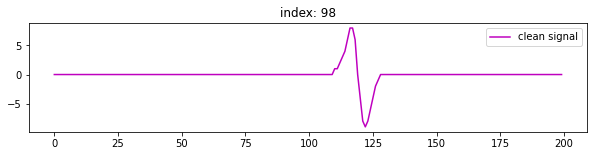

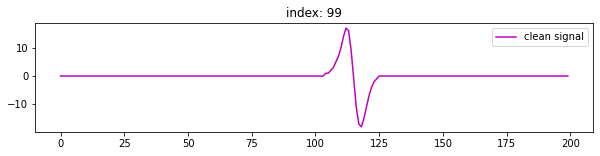

In [23]:
for i in range(100):
    fig = plt.figure(figsize = (10, 2))
    plt.plot(clean_signal_bp_2[i], color='m', label='clean signal')
    plt.title('index: ' + str(i))
    plt.legend()
    #plt.ylim(-0.1, 0.1)
    plt.show()